In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv(r"C:\Users\Kuberan\Downloads\Fitness_data.csv")
data['fitness_class_encoded'] = data['fitness_class'].map({
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Excellent': 3
})

data['gender_encoded'] = data['gender'].map({'M': 0, 'F': 1})
X = data.drop(columns=['user_id', 'fitness_class', 'fitness_class_encoded', 'gender'])
X['gender'] = data['gender_encoded']
y = data['fitness_class_encoded']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

def predict_fitness_class(features):
    prediction = model.predict([features])[0]
    mapping = {0: 'Poor', 1: 'Fair', 2: 'Good', 3: 'Excellent'}
    return mapping[prediction]

input_features = [float(input(f"Enter value for {col}: ")) for col in X.columns]
predicted_class = predict_fitness_class(input_features)
print(f"Predicted Fitness Class: {predicted_class}")

Enter value for age:  25
Enter value for height_cm:  165
Enter value for weight_kg:  58
Enter value for daily_steps:  12000
Enter value for avg_heart_rate:  72
Enter value for sleep_hours:  7.5
Enter value for active_minutes:  65
Enter value for calories_burned:  2200
Enter value for stress_level:  2
Enter value for resting_heart_rate:  65
Enter value for exercise_frequency:  5
Enter value for bmi:  21.385
Enter value for health_score:  1
Enter value for gender_encoded:  1
Enter value for gender:  1


Predicted Fitness Class: Excellent


D:\conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


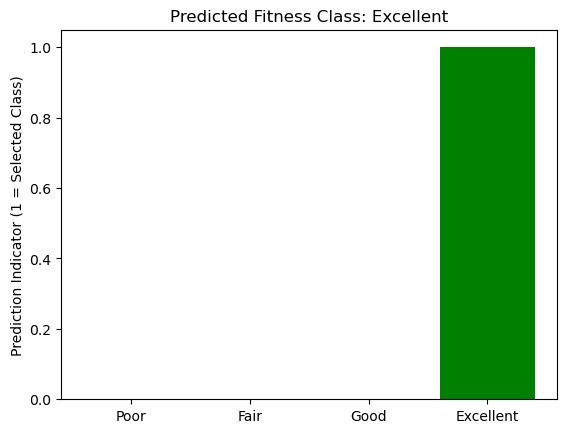

In [23]:
categories = ['Poor', 'Fair', 'Good', 'Excellent']
predicted_index = categories.index(predicted_class)
counts = [1 if i == predicted_index else 0 for i in range(4)]

plt.bar(categories, counts, color=['red', 'orange', 'blue', 'green'])
plt.title(f"Predicted Fitness Class: {predicted_class}")
plt.ylabel("Prediction Indicator (1 = Selected Class)")
plt.show()